In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
data_to_extract = pd.read_excel('Suivi_PRI.xlsx', sheet_name="Donnees_Sorties")

In [3]:
data_to_extract

,Bdsid,Master Id,Client,Site,Famille,Offre Consolidee,Offre,Declinaison Offre,Produit,Techno Acces,...,Abo Keuros Dim,Fas Keuros Dim,PRI_keuros,Date Mef,AnneeSemaine_Mef,Date Affectationcdp,Contrat Cadre,Spécificité,ID_commande_price,Type_Acte_PB
0,9395248,0000000009455171,DIRECTION Sces ADMINISTRATIFS FINANCIERS,CD-CHATEAUDUN,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.3215,0.0,0.3215,2021-03-31,202113,2018-06-15,37358.0,NaN,NaN,NaN
1,9425565,0000000009471782,DIRECTION Sces ADMINISTRATIFS FINANCIERS,MA-BORGO,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7365,0.0,0.7365,2021-03-30,202113,2018-06-27,37358.0,NaN,NaN,NaN
2,9427794,0000000009467458,EIFFAGE SYSTEMES D'INFORMATION,EIFFAGE SI/ENROBES DE LA CRAU ISTRES,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.0760,0.0,0.0760,2021-03-10,202110,2018-06-27,39607.0,NaN,NaN,NaN
3,9445066,0000000009470962,DIRECTION Sces ADMINISTRATIFS FINANCIERS,TGI-VALENCE,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP THD,FO / THD,...,0.7920,0.0,0.7920,2021-03-30,202113,2018-07-03,37358.0,NaN,NaN,NaN
4,9937745,0000000009720098,COLRUYT RETAIL France,CODIFRANCE FAULQUEMONT,DATA,9 IP NET,9 IP NET,9iPnet,Prise IP DSL avec routeur,DSL,...,0.1300,0.0,0.1300,2021-03-08,202110,2019-01-15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,12513838,AVSBO0000000005878,ALTIVERALU,ALTIVERALU ST PATERNE RACAN(0000003850240),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès OTT,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37747.0,NaN,2100360232-001,RESIL
6173,12513958,0000000004650011,COM DE COMMUNES DES PORTES DU LUXEMBOURG,C.C.P.L. CARIGNAN(0000002413451),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,36424.0,NaN,2100360478-001,RESIL
6174,12514793,0000000006481117,TRANSPORT 2000,TRANSPORT 2000 GARGES LES GONESSE(0000003125780),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès ADSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37277.0,NaN,2100362126_EXEC-001,COPTL
6175,12514998,0000000010292193,COOP FRUITS LEGUMES PYRENEES ORIENTALES,COOP FRUITS LEGUMES PYRENEES O(0000003698054),COMMUNICATIONS UNIFIEES,Pack Business Entreprises,Pack Business Entreprises,TEC01,Accès SDSL,NaN,...,0.0000,0.0,0.0000,2021-03-31,202113,NaT,37281.0,NaN,2100362512-001,RESIL


In [4]:
""" Ask the file to use and load """
def initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract, name_new_file_extract, name_col,
                                name_id_to_sort):
    dest_filename = name_file
    print(dest_filename)
    data_to_extract = pd.read_excel(dest_filename, sheet_name=name_sheet) # read file to give 
    new_data = data_to_extract[data_to_extract[name_col]==name_keyword_for_extract].sort_values(by=[name_id_to_sort]) # make 
    # extraction from dest_filename for having only data link to nele_keywork_for_extract
    if name_sheet == "Donnees_Sorties":
        data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                                  "Date Debut Dplt", "Date Cr Lien BDSID","Date Installation Client",
                                  "Date Mise En Service", "Date Mef",]] # only column that I want
    elif name_sheet == "Donnees_Stock":
        data = new_data[["Bdsid","Master Id","Client", "Operation","Offre","Cdp",
                                  "Date Debut Dplt", "Date_Cr_Lien_BDSID",'Date Installation Client',
                                 "Date Installation Technique","Date Installation Planifiee",
                                 "Date Mise En Service"]] # only column that I want
    data_to_treat = data[data["Operation"] == "ACTIVATION"].sort_values(by=[name_id_to_sort])
    data_to_treat.to_excel(name_new_file_extract, sheet_name=name_sheet, index = False) # create new 
    data_to_treat_no_Nan = data_to_treat.dropna()
    '''print(data_to_treat_no_Nan)
    print(data_to_treat)'''
    return data_to_treat_no_Nan, data_to_treat
# file contains data in new_data
#print("fini")

In [5]:
pd.read_excel('New_Suivi_PRI.xlsx')

,Bdsid,Master Id,Client,Operation,Offre,Cdp,Date Debut Dplt,Date_Cr_Lien_BDSID,Date Installation Client,Date Installation Technique,Date Installation Planifiee,Date Mise En Service
0,8873282,0000000009191700,SERVICE DEPARTEMENTAL D'INCENDIE,ACTIVATION,9 IP NET,fjubet,2017-11-22,2017-12-27,NaT,NaT,NaT,NaT
1,8963369,0000000009253580,PIPELINE SUD EUROPEEN,ACTIVATION,9 IP NET,dmarginier,2017-12-28,NaT,NaT,NaT,NaT,NaT
2,9100916,HM0010000006413,MONOPRIX EXPLOIT PAR ABREVIATION MPX,ACTIVATION,9 IP NET,DPL_DA,2018-02-20,2019-06-25,NaT,NaT,2021-01-18 10:00:00,NaT
3,9109465,HM0010000006597,DIRECTION Sces ADMINISTRATIFS FINANCIERS,ACTIVATION,9 IP NET,ddiakite,2018-02-22,NaT,NaT,NaT,NaT,NaT
4,9256401,0000000009394367,DIRECTION Sces ADMINISTRATIFS FINANCIERS,ACTIVATION,9 IP NET,slaatiris,2018-04-18,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,12497891,MR0010000146523,SONEPAR FRANCE INTERSERVICES,ACTIVATION,9 IP NET,yallal,2021-03-26,NaT,NaT,NaT,NaT,NaT
1176,12497969,MR0010000146521,SONEPAR FRANCE INTERSERVICES,ACTIVATION,9 IP NET,yallal,2021-03-26,NaT,NaT,NaT,NaT,NaT
1177,12503766,MR0010000146201,DPD France,ACTIVATION,9 IP NET,galberti,2021-03-29,NaT,NaT,NaT,NaT,NaT
1178,12512742,MR0010000148293,AEROPORTS GRAND OUEST,ACTIVATION,9 IP NET,att_affectation_cdp,2021-03-31,NaT,NaT,NaT,NaT,NaT


In [6]:
def days_holyday(year):
    list_of_days_holyday = ["01/01", "13/04", "01/05", "08/05", "21/05", "14/07", "15/08", "01/11", "11/11", "25/12"]
    list_of_day_holyday = []
    list_of_month_holyday = []
    list_holydays = []
    for date in range(len(list_of_days_holyday)):
        s = list_of_days_holyday[date].split("/")
        list_holydays.append(datetime.datetime(year,
                                              int(s[1].replace('0','')),
                                              int(s[0].replace('0',''))))
        list_holydays[date]= list_holydays[date].date()
    return list(list_holydays)
    

In [7]:
def nb_weekday_between_two_date(d, end, excluded=(6, 7)):
    days = []
    nb_week = 0
    nb_days = 0
    insert = True
    holydays_date = []
    for i in range(d.year,(end.year+1)):
        holydays_date = list(set(holydays_date + days_holyday(i)))
    if d.date() > end.date():
        d , end = end, d
    while d.date() <= end.date():
        insert = True
        #if(pd.isnull(d.date()) == False and pd.isnull(end.date()) == False):
        d += datetime.timedelta(days=1)
        if (d.isoweekday() not in excluded and d.date() not in holydays_date)and d.date() <= end.date():
            days.append(d)
        else:
            insert = False 
        if ((len(days)%5) == 0) and insert == True:
            nb_week += 1
            nb_days +=5   
        #else:
         #   break
                
    if(len(days)%5 != 0):
        nb_days =(len(days)- nb_days)
    else:
        nb_days = 0
    #return str(nb_week)+" weeks and "+str(nb_days)+" days"
    return nb_week, nb_days
"""
print(nb_weekday_between_two_date(datetime.datetime(2020,6,5),datetime.datetime(2020,8,28)))"""

'\nprint(nb_weekday_between_two_date(datetime.datetime(2020,6,5),datetime.datetime(2020,8,28)))'

In [8]:
def evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, offre):
    list_step_to_nan = ["First Step Nan", "Second Step Nan", "Third Step Nan", "Fourth Step Nan"]
    list_evaluation_to_nan=[]
    moy = 0
    ecart = 0
    dict_to_eval_nan = {"First Step Nan":0, "Second Step Nan":0, "Third Step Nan":0, "Fourth Step Nan":0}
    #one_date = "Date_Cr_Lien_BDSID"
    all_offre = list(data_to_treat_no_Nan['Offre'])
    if(name_sheet == "Donnees_Stock"):
        del dict_to_eval_nan["Fourth Step Nan"]
    for offre in range(len(all_offre)):
        if(name_sheet == "Donnees_Stock"):
            if(pd.isnull(list(data_to_treat_no_Nan["Date Installation Technique"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            elif(pd.isnull(list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]) == True):
                 list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Technique"])[offre]
            else:
                list(data_to_treat_no_Nan['Date Installation Client'])[offre] =  list(data_to_treat_no_Nan["Date Installation Planifiee"])[offre]
            
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre],
                                   list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date_Cr_Lien_BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
        else:
            list_of_all_date = [list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre],
                               list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre],
                               list(data_to_treat_no_Nan['Date Mef'])[offre]]
            dict_to_eval_nan["First Step Nan"] = dict_to_eval_nan["First Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Debut Dplt'])[offre], list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre])[0]
            dict_to_eval_nan["Second Step Nan"] = dict_to_eval_nan["Second Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Cr Lien BDSID'])[offre], list(data_to_treat_no_Nan['Date Installation Client'])[offre])[0]
            dict_to_eval_nan["Fourth Step Nan"] = dict_to_eval_nan["Fourth Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Mise En Service'])[offre], list(data_to_treat_no_Nan['Date Mef'])[offre])[0]
            
        dict_to_eval_nan["Third Step Nan"] = dict_to_eval_nan["Third Step Nan"] + nb_weekday_between_two_date(list(data_to_treat_no_Nan['Date Installation Client'])[offre], list(data_to_treat_no_Nan['Date Mise En Service'])[offre])[0]
    
    for key,value in dict_to_eval_nan.items():
        dict_to_eval_nan[key]=round(value/len(all_offre))
    return dict_to_eval_nan
        
"""dico_to_eval_nan = evaluation_date_replace_nan(data_to_treat_no_Nan,"Donnees_Stock", "9 IP NET")
dico_to_eval_nan"""
    

'dico_to_eval_nan = evaluation_date_replace_nan(data_to_treat_no_Nan,"Donnees_Stock", "9 IP NET")\ndico_to_eval_nan'

In [9]:
def check_nb_week_use_to_nan(step_at_moment,dico_to_eval_nan):
    return datetime.timedelta(weeks=dico_to_eval_nan[step_at_moment+" Nan"])


In [10]:
def calcul_total_week_do_by_cdp(cdp, l_day, dict_time_do):
    total_week, total_day = 0, 0
    cpt_day = 0
    for key, value in dict_time_do.items():
        week = 0
        #split_value = #value.split(" weeks and ")
        week = value #int(split_value[0])
        day = l_day[cpt_day] #int(split_value[1].replace(" days",""))
        total_week = total_week + week
        if total_day >= 5:
            total_week += 1
            total_day = total_day - 5
        else:
            total_day = total_day + day
        cpt_day +=1 
    return total_week    

In [11]:
def create_dict_cdp_time_do(name_cdp, name_project, idProject, list_date_to_check, name_sheet,dico_to_eval_nan):
    list_step = ["First Step", "Second Step", "Third Step", "Fourth Step", "Total week"]
    dict_cdp_time_do = {}
    dict_step_to_do_cdp = {}
    l_day = []
    if(name_sheet == "Donnees_Stock"):
        del list_step[3]       
    for i in range(len(list_step)-1):
        week_to_add = 0
        if(pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == False):
            week_to_add = check_nb_week_use_to_nan(list_step[i],dico_to_eval_nan)
            list_date_to_check[i] = list_date_to_check[i+1]-week_to_add
        elif(pd.isnull(list_date_to_check[i]) == False and pd.isnull(list_date_to_check[i+1]) == True):
            week_to_add = check_nb_week_use_to_nan(list_step[i],dico_to_eval_nan)
            list_date_to_check[i+1] = list_date_to_check[i]+week_to_add
        elif pd.isnull(list_date_to_check[i]) == True and pd.isnull(list_date_to_check[i+1]) == True:
            indexNames = data_to_treat[idProject].index
            data_to_treat.drop(indexNames , inplace=True)
            continue
            #list_date_to_check[i+1] = list_date_to_check[i] = datetime.datetime(datetime.datetime.now().year,
             #                                                                   datetime.datetime.now().month,
              #                                                                  datetime.datetime.now().day)
        date1 = str(list_date_to_check[i]).split(' ')[0].split("-")
        date2 = str(list_date_to_check[i+1]).split(' ')[0].split("-")

        end = datetime.datetime(int(date2[0]),int(date2[1]),int(date2[2]))
        deb = datetime.datetime(int(date1[0]),int(date1[1]),int(date1[2]))


        dict_step_to_do_cdp[list_step[i]], day = nb_weekday_between_two_date(deb, end)
        l_day.append(day)
    dict_step_to_do_cdp[list_step[len(list_step)-1]] = calcul_total_week_do_by_cdp(name_cdp, l_day, dict_step_to_do_cdp)
    dict_cdp_time_do[name_cdp] = dict_step_to_do_cdp
    dict_cdp_time_do['Project'] = name_project
    dict_cdp_time_do['IdProject'] = idProject
    #print(dict_cdp_time_do)
    return dict_cdp_time_do


In [12]:
def dataviz_Onecdp_Oneproject(dico_date_in_week,name_cdp, name_project, idProject):
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    for search in list_time_to_do:
        if search['IdProject'] == idProject:
            xl = list(search[name_cdp].keys())[:len(list_step_to_do)-1]
            yl = list(search[name_cdp].values())[:len(list_step_to_do)-1]
            break
    #print(xl)
    #plt.figure(figsize=(9,6), dpi=80)
    fig, ax = plt.subplots()
    ax.bar(xl,yl)
    plt.title(f"Temps effectuer par étape par le cdp : {name_cdp} pour le projet {name_project} d'id {idProject}")
    
    plt.setp(ax.get_xticklabels(),rotation=360)
    plt.tick_params(axis='x', which='major', labelsize=15, labelcolor="white")
    plt.tick_params(axis='y', which='major', labelsize=15, labelcolor="white")
    #plt.tight_layout()
   
    plt.xlabel("Step", size=15, color="white")
    plt.ylabel("Number week", size=15, color="white")
    plt.savefig('figsize_test3.png')
"""dataviz_Onecdp_Oneproject(dict_all_cdp_time_do,'fjubet','MUTUELLE DE POITIERS ASSURANCES', 10300094)
"""

"dataviz_Onecdp_Oneproject(dict_all_cdp_time_do,'fjubet','MUTUELLE DE POITIERS ASSURANCES', 10300094)\n"

In [13]:
def create_dataviz(x,y,name_xlabel, name_ylabel, titles, name_img, colors):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    plt.setp(ax.get_xticklabels(),rotation=90, ha="right")
    plt.tick_params(axis='x', which='major', labelsize=10, labelcolor=colors)
    plt.tick_params(axis='y', which='major', labelsize=10, labelcolor=colors)
    plt.tight_layout()
    plt.xlabel(name_xlabel, size=10,color=colors)
    plt.ylabel(name_ylabel, size=10,color=colors)
    plt.title(f'titles{colors}')
    plt.savefig(name_img)
#create_dataviz(['a','e','d','q'], [2,4,5,9],"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'figsize_test5.png','white')

In [14]:
def do_my_dataviz(list_time_to_do,name_cdp,l=1,c=1,px=1,py=1):
    fig, ax = plt.subplots()
    xl=[]
    yl=[]
    for search in list_time_to_do:
        xl.append(str(search['IdProject']))
        yl.append(int(search[name_cdp]['Total week']))
    ax.bar(xl,yl)
    plt.setp(ax.get_xticklabels(),rotation=90, ha="right")
    plt.tick_params(axis='x', which='major', labelsize=10, labelcolor="white")
    plt.tick_params(axis='y', which='major', labelsize=10, labelcolor="white")
    plt.tight_layout()
    plt.xlabel("Projects", size=20,color='white')
    plt.ylabel("Total time", size=20,color='white')
    plt.title(f"Temps totale effectuer pour chacun de ces projets par le cdp : {name_cdp}")
    xl=yl=[]
    plt.savefig('figsize_test2.png')
    
def dataviz_AllProject_TotalTime_OneCdp(dico_date_in_week,name_cdp):
    N=30
    n= 30
    NB_GRAPH = 1
    list_step_to_do = []
    xl = []
    yl = []
    list_time_to_do = dico_date_in_week[name_cdp]
    before = 0
    taille = len(list_time_to_do)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        print(NB_GRAPH)
        print(taille)
        """NB_GRAPH=taille/N
        if(NB_GRAPH>int(NB_GRAPH)):
            NB_GRAPH=int(NB_GRAPH)+1
        if(NB_GRAPH%2==0):
            l=NB_GRAPH/2
        else:
            l=int(NB_GRAPH/2)+1
        print(NB_GRAPH)"""
        for z in range(NB_GRAPH):
            print(z)
            print(before, N)
            list_time_to_do = dico_date_in_week[name_cdp][before:N]
            for search in list_time_to_do:
                xl.append(str(search['IdProject']))
                yl.append(int(search[name_cdp]['Total week']))
                #print(xl,yl)
            print(xl,yl)
            #do_my_dataviz(list_time_to_do,name_cdp)
            create_dataviz(xl,yl,"Projects", "Total time", "Temps totale effectuer pour chacun de ces projets par le cdp", "figsize_test16.png", 'white')
            xl=[]
            yl=[]
            before=N
            N+=n
    else:
        create_dataviz(xl,yl,"Projects", "Total time", "Temps totale effectuer pour chacun de ces projets par le cdp", "figsize_test2.png", 'white')
            

            
#dataviz_AllProject_TotalTime_OneCdp(dict_all_cdp_time_do,'fjubet')

In [15]:
def calculate_TotalTime_AllProject_Avg_OneCdp(dico_date_in_week,name_cdp):
    moy, somme = 0, 0
    list_time_to_do = dico_date_in_week[name_cdp]
    if(type(list_time_to_do[-1]) != int):
        for search in list_time_to_do:
            somme = somme + search[name_cdp]['Total week']
        moy = int(int(somme) / int(len(list_time_to_do)))
        dico_date_in_week[name_cdp].append(moy)
        return moy
    else:
        return list_time_to_do[-1]
"""for key, value in dict_all_cdp_time_do.items():
    calculate_week_average_every_cdp(dict_all_cdp_time_do,key)
print(dict_all_cdp_time_do['aabes'])"""


"for key, value in dict_all_cdp_time_do.items():\n    calculate_week_average_every_cdp(dict_all_cdp_time_do,key)\nprint(dict_all_cdp_time_do['aabes'])"

In [16]:
def check_nb_graph_create(taille,N=30,n= 30,NB_GRAPH = 1,before = 0):
    NB_GRAPH=taille/N
    if(NB_GRAPH>int(NB_GRAPH)):
        NB_GRAPH=int(NB_GRAPH)+1
    if(NB_GRAPH%2==0):
        l=NB_GRAPH/2
    else:
        l=int(NB_GRAPH/2)+1
    return NB_GRAPH
#check_nb_graph_create(48)

In [17]:

def dataviz_AllCdp_AvgTime(dico_date_in_week,list_cdp):
    N=30
    n= 30
    NB_GRAPH = 1
    before=0
    list_step_to_do = []
    xl = []
    yl = []
    xl=list_cdp
    for key, value in dico_date_in_week.items():
        yl.append(value[-1])
    print(yl)
    #list_step_to_do = list(dico_date_in_week[name_cdp].keys())[:len(list_step_to_do)-1]
    #plt.figure(1, figsize=(15, 13))
    taille = len(xl)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        for z in range(NB_GRAPH):
            print(before, N)
            list_time_to_do_x = xl[before:N]
            list_time_to_do_y = yl[before:N]
            create_dataviz(list_time_to_do_x, list_time_to_do_y,"Step","Nb Week","Temps moyen effectuer par chaque cdp pour tout leur projet ",'figsize_test1.png','white')
            before=N
            N+=n
    else:
        create_dataviz(list_time_to_do_x, list_time_to_do_y,"Step","Nb Week","Temps moyen effectuer par chaque cdp pour tout leur projet ",'figsize_test1.png','white')
            
#dataviz_AllCdp_AvgTime(dict_all_cdp_time_do,list_cdp_without_duplication)

In [18]:
def check_cdp_out_of_limit_AllProject(dict_delay):
    nb_cdp_in_limit = 0
    list_cdp_in_limit = []
    nb_cdp_out_limit = 0
    list_cdp_out_limit = []
    nb_cdp_equal_limit = 0
    list_cdp_equal_limit = []
    for value in range(len(dict_delay)-1):
        if dict_delay[value][name_cdp]['Total week'] < 4:
            nb_cdp_in_limit +=1
            list_cdp_in_limit.append(dict_delay[value]['IdProject'])            
        elif dict_delay[value][name_cdp]['Total week'] > 4:
            nb_cdp_out_limit +=1
            list_cdp_out_limit.append(dict_delay[value]['IdProject'])  
        else:
            nb_cdp_equal_limit +=1
            list_cdp_equal_limit.append(key) 
    percent_in_limit = round((nb_cdp_in_limit*100)/len(dict_delay))
    percent_out_limit = round((nb_cdp_out_limit*100)/len(dict_delay))
    percent_equal_limit = round((nb_cdp_equal_limit*100)/len(dict_delay))
    return [percent_in_limit, percent_equal_limit, percent_out_limit], list_cdp_in_limit, list_cdp_out_limit,list_cdp_equal_limit
"""print(dict_all_cdp_time_do['fjubet'])
a = check_cdp_out_of_limit_AllProject(dict_all_cdp_time_do['fjubet'])
print(a)"""



"print(dict_all_cdp_time_do['fjubet'])\na = check_cdp_out_of_limit_AllProject(dict_all_cdp_time_do['fjubet'])\nprint(a)"

In [19]:
def dataviz_check_OneCdp_out_limit_All_Project(list_delay):
    l = ["IN Limit", "Equal Limt", "Out Limit"]
    fig, ax = plt.subplots()
    ax.bar(l,list_delay[0])
    #plt.setp(ax.get_xticklabels(),rotation=90, ha="right")
    # limites de l'axe (O,x) des abscisses
    #plt.xlim(0.0,3.0)

    # graduations de l'axe (O,x) des abscisses
    #plt.xticks(np.linspace(0,1,2,endpoint=True))

    # limites de l'axe (O,y) des ordonnées
    #plt.ylim(1.0,1.0)

    # graduations de l'axe (O,y) des ordonnées
    #plt.yticks(np.linspace(3,5,10,endpoint=True))
    
    plt.tick_params(axis='x', which='major', labelsize=10, labelcolor='white')
    plt.tick_params(axis='y', which='major', labelsize=10, labelcolor='white')
    plt.tight_layout()
    plt.xlabel("Type de limit",size=15, color="white")
    plt.ylabel("Pourcentage de projet",size=15, color="white")
    plt.title(f"Representation du pourcentage de projet hors limite de date")
    #plt.savefig('figsize_test0.png')
#dataviz_check_OneCdp_out_limit_All_Project(a)

Suivi_PRI.xlsx
2                    fjubet
8                dmarginier
12                   DPL_DA
13                 ddiakite
196               slaatiris
               ...         
7099                 yallal
7103                 yallal
7289               galberti
7522    att_affectation_cdp
7575    att_affectation_cdp
Name: Cdp, Length: 1180, dtype: object
{'skonan': [{'skonan': {'First Step': 6, 'Second Step': 11, 'Third Step': 0, 'Total week': 18}, 'Project': "RTE RESEAU DE TRANSPORT D'ELECTRICITE", 'IdProject': 10166707}, {'skonan': {'First Step': 28, 'Second Step': 11, 'Third Step': 0, 'Total week': 40}, 'Project': 'CNAM', 'IdProject': 11368786}, {'skonan': {'First Step': 4, 'Second Step': 7, 'Third Step': 0, 'Total week': 11}, 'Project': 'CNAM', 'IdProject': 12105713}, {'skonan': {'First Step': 11, 'Second Step': 11, 'Third Step': 0, 'Total week': 22}, 'Project': 'CNAM', 'IdProject': 12138288}], 'mzhang': [{'mzhang': {'First Step': 19, 'Second Step': 11, 'Third Step': 0, 'Total

1
30 60
['10367389', '10367421', '10369730', '10369855', '10370204', '10370284', '10370495', '10371853', '10371878', '10372498', '10372624', '10372631', '10372752', '10372837', '10373272', '10373410', '10373590', '10373680', '10373714', '10373834', '10373911', '10373926', '10377746', '10377787', '10378753', '10379084', '10379628', '10379791', '10380007', '10380082'] [79, 95, 37, 85, 31, 43, 33, 95, 69, 82, 31, 80, 43, 80, 44, 66, 43, 82, 81, 97, 94, 100, 43, 47, 76, 32, 41, 31, 80, 31]
2
60 90
['10380090', '10380200', '10380287', '10380367', '10380379', '10380385', '10380621', '10380736', '10381599', '10385166', '10385732', '10385958', '10385970', '10386076', '10386212', '10386546', '10386585', '10386631', '10389206', '10389696', '10390969', '10390985', '10391114', '10391274', '10391406', '10391429', '10391621', '10391676', '10391784', '10391796'] [44, 31, 78, 46, 42, 86, 42, 47, 80, 41, 79, 41, 42, 85, 42, 41, 84, 79, 31, 87, 40, 31, 37, 80, 80, 83, 41, 42, 91, 31]
3
90 120
['10393003

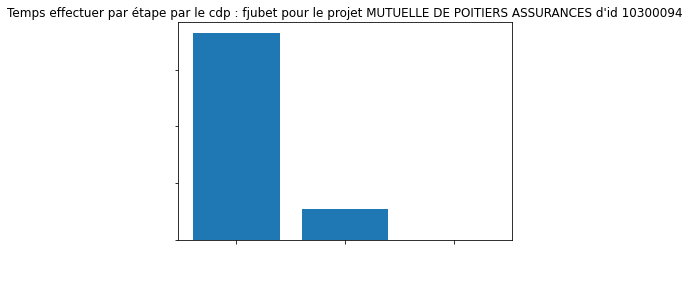

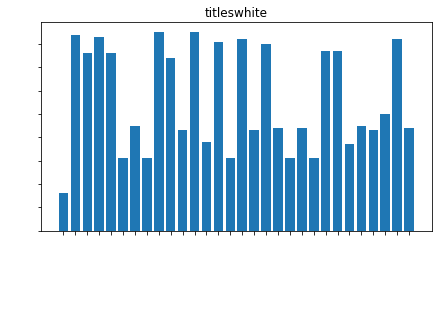

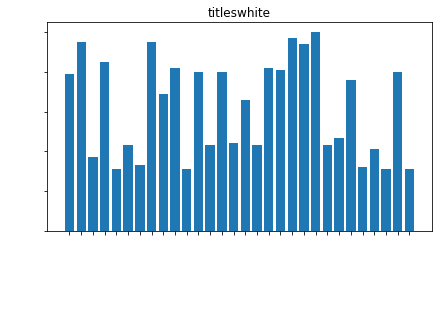

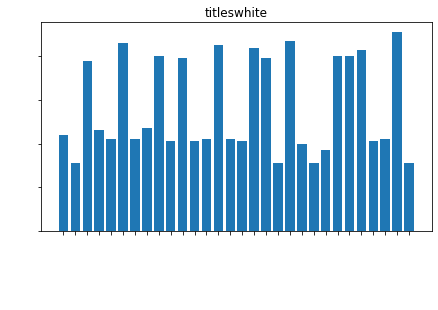

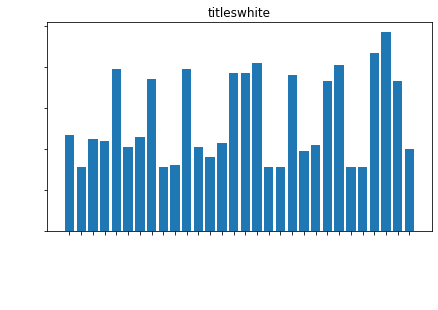

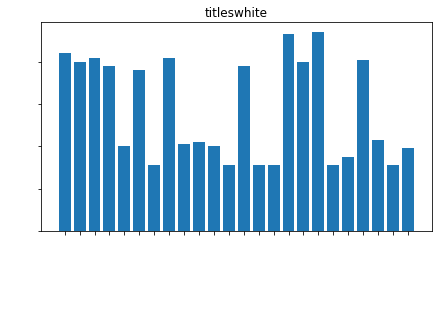

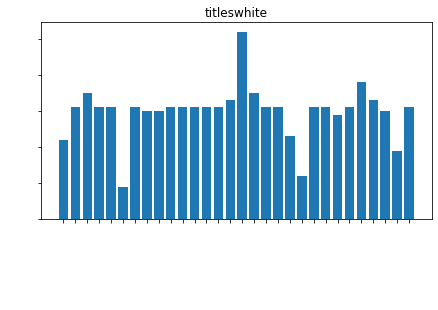

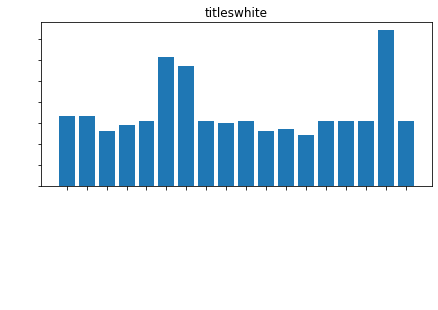

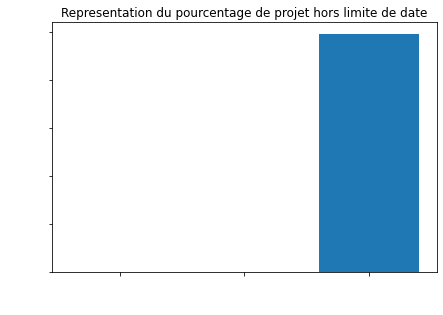

In [20]:
if __name__ == '__main__': # It's the main
    config = pd.read_excel('Config.xlsx')
    list_var = config["values"]
    #print(list_var)#input('Entrez le nom du fichier a analyser : ')+".xlsx"
    name_file = list_var[0]
    name_col_offre = list_var[1]
    name_sheet = list_var[2] #input("Entrez le nom de la feuille a analyser : ")
    name_keyword_for_extract = list_var[3]#input("Le nom de la colonne en fonction duquel se fera le doublons :  ")
    name_new_file_extract = "New_"+name_file#input("Nom du nouveau fichier créé : ")+"xlsx"
    name_id_to_sort = list_var[4]
    name_cdp=list_var[5]
    name_project = list_var[6]
    idProject = list_var[7]
    dict_to_eval_date_nan={}
    data_to_treat_no_Nan, data_to_treat = initialization_of_treatment(name_file, name_sheet, name_keyword_for_extract,
                                name_new_file_extract, name_col_offre,name_id_to_sort)
    print(data_to_treat['Cdp'])
    if(len(data_to_treat_no_Nan) == 0):
        print(f"Les données présents sont insuffisants pour l'étude de l'offre {name_keyword_for_extract}")
    else:        
        dict_to_eval_date_nan = evaluation_date_replace_nan(data_to_treat_no_Nan,name_sheet, name_col_offre)
        all_cdp = list(data_to_treat['Cdp'])
        all_project = list(data_to_treat['Client'])
        all_Idproject = list(data_to_treat['Bdsid'])
        list_action_cdp = []
        dict_all_cdp_time_do={}
        list_action_every_cdp = []
        list_cdp_without_duplication=[]

        for cdp in range(len(all_cdp)):
            if(name_sheet == "Donnees_Stock"):
                list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date_Cr_Lien_BDSID'])[cdp],
                                       list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp]]
            else:
                list_of_all_date = [list(data_to_treat['Date Debut Dplt'])[cdp], list(data_to_treat['Date Cr Lien BDSID'])[cdp],
                                   list(data_to_treat['Date Installation Client'])[cdp], list(data_to_treat['Date Mise En Service'])[cdp],
                                   list(data_to_treat['Date Mef'])[cdp]]
            if(type(all_cdp[cdp]) != str):
                all_cdp[cdp] = "Sans nom"
            list_action_cdp.append(create_dict_cdp_time_do(all_cdp[cdp], all_project[cdp], all_Idproject[cdp], list_of_all_date, name_sheet, dict_to_eval_date_nan))

        list_cdp_without_duplication = list(set(all_cdp))
        time.sleep(5)
        for cdp in list_cdp_without_duplication :
            for act_cdp in list_action_cdp:
                if cdp == list(act_cdp.keys())[0]:
                    list_action_every_cdp.append(act_cdp)
                    dict_all_cdp_time_do[cdp] = list_action_every_cdp
            list_action_every_cdp=[]
        print(dict_all_cdp_time_do)
        #plt.figure(1, figsize=(15, 13))
        #fig,ax = plt.subplots()
        dataviz_Onecdp_Oneproject(dict_all_cdp_time_do,name_cdp, name_project, idProject)
        dataviz_AllProject_TotalTime_OneCdp(dict_all_cdp_time_do,name_cdp)
        for key, value in dict_all_cdp_time_do.items():
            calculate_TotalTime_AllProject_Avg_OneCdp(dict_all_cdp_time_do,key)
        dataviz_AllCdp_AvgTime(dict_all_cdp_time_do,list_cdp_without_duplication)
        #list_out_bounds = check_cdp_out_of_limit_AllProject([{'fjubet': {'First Step': 27, 'Second Step': 11, 'Third Step': 0, 'Total week': 39}, 'Project': 'MUTUELLE DE POITIERS ASSURANCES', 'IdProject': 10534312}, 57], 'fjubet')
        list_out_bounds = check_cdp_out_of_limit_AllProject(dict_all_cdp_time_do[name_cdp])
        dataviz_check_OneCdp_out_limit_All_Project(list_out_bounds)

In [21]:
list(data_to_treat['Cdp'])[10]

'nboufraine'

{'Sans nom': 1, 'skonan': 4, 'mzhang': 10, 'VDIx0D02': 4, 'elongedo': 2, 'dmarginier': 1, 'TYBx0D38': 1, 'TYBx0D05': 109, 'shouel': 15, 'aabes': 15, 'TYBx0D21': 2, 'demorel': 8, 'AUSx0N22': 1, 'allanglois': 4, 'yallal': 3, 'rjanani': 2, 'sbouarab': 2, 'ehouba': 11, 'rdabire': 2, 'TYBx0D08': 2, 'kjamet': 2, 'jprieto2': 1, 'atmx0D53': 2, 'bboulaud': 2, 'hbenhamadi': 13, 'DPL_DA': 35, 'slaatiris': 54, 'nboufraine': 167, 'AGTx0D11': 1, 'flvincent': 1, 'mvallebella': 19, 'TYBx0D13': 1, 'AUSx0N39': 17, 'mbelkhaouel': 3, 'nettaki': 4, 'ihamza': 2, 'fjubet': 143, 'att_affectation_cdp': 455, 'AGTx0D36': 7, 'akaabeche': 1, 'ddiakite': 8, 'galberti': 8, 'yaissani': 3, 'bsabatier': 1, 'otenaud': 2, 'gberthion': 4, 'TYBx0D32': 6, 'jsides': 1}


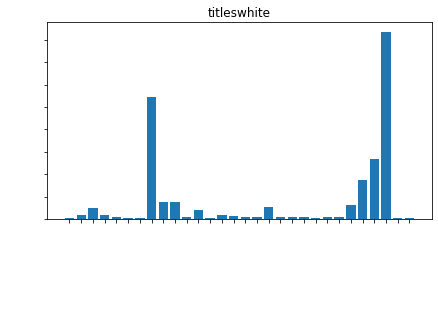

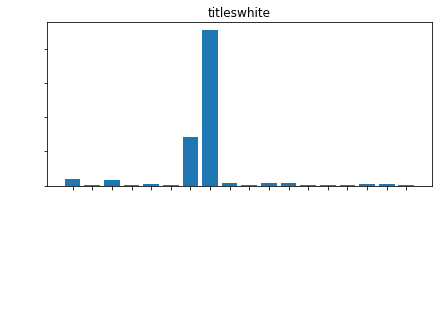

In [22]:
def listCdp_numberProject(data):
    #print('********************** Liste des CDPs *************************')
    list_cdp_sans_doublons = list(set(data['Cdp']))
    list_cdp = list(data['Cdp'])
    list_project = list(data['Bdsid'])
    cpt_project = 0
    dict_cdp_and_project = {}
    
    for c in range(len(list_cdp_sans_doublons)):
        cdp = list_cdp_sans_doublons[c]
        if(type(cdp) != str):
            list_cdp[c] = "Sans nom"
            cdp = list_cdp[c]
        for p in range(len(list_project)):
            if(list_cdp[p] == cdp):
                cpt_project+=1
        dict_cdp_and_project[cdp] = cpt_project
        cpt_project = 0
    return dict_cdp_and_project     

def dataviz_cdp_and_nbProject(data_to_treat):
    N=30
    n= 30
    NB_GRAPH = 1
    before = 0
    dico = listCdp_numberProject(data_to_treat)
    print(dico)
    x=[]
    y=[]
    for key, value in dico.items():
        x.append(key)
        y.append(value)
    taille = len(x)
    if(taille>30):
        NB_GRAPH = check_nb_graph_create(taille)
        for z in range(NB_GRAPH):
            list_time_to_do_x = x[before:N]
            list_time_to_do_y = y[before:N]
            create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'figsize_test15.png','white')
            before=N
            N+=n
    else:
        create_dataviz(list_time_to_do_x, list_time_to_do_y,"cdp","Nombre de projets","Chaque cdp avec son nombre de projet",'figsize_test15.png','white')
            
dataviz_cdp_and_nbProject(data_to_treat)
    

In [23]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [59.50, 19.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
y = np.exp(2)
plt.plot(x, y)
plt.xlabel("$\\bf{y=e^{x}}$")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

NameError: name 'x' is not defined

<Figure size 4284x1404 with 0 Axes>

In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt

#make dummy data
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
y=np.random.rand(len(x))

plt.figure()
plt.plot(x, y)
plt.bar(x, y)
plt.title(f"średnia cena produktu, według kontrahentów")
plt.xlabel("kontrahent")
plt.ylabel("cena")
plt.xticks(x, [str(i) for i in y], rotation=90)

#set parameters for tick labels
plt.tick_params(axis='y', which='major', labelsize=60)
plt.tick_params(axis='x', which='major', labelsize=60)

plt.tight_layout()"""

In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt

N = 450
data = np.linspace(0, N, N)

plt.plot(data)

plt.xticks(range(N)) # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=70.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
y=np.random.rand(len(x))
plt.figure(figsize=(9,6), dpi=80)
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.show()


In [ ]:
a = 1.2
b=1
if(a > int(a)):
    a = int(a)+1
    print(a)
else:
    print("no")

In [ ]:
d={}
if(empty(d)==True):
    print("er")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), "bo")
plt.plot(t2, f(t2), "k")

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), "r--")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(221)", ha="center", va="center", size=24, alpha=.5)

#plt.subplot(222)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(222)", ha="center", va="center", size=24, alpha=.5)

#plt.subplot(223)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(223)", ha="center", va="center", size=24, alpha=.5)

#plt.subplot(224)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(224)", ha="center", va="center", size=24, alpha=.5)

plt.show()